<a href="https://colab.research.google.com/github/hyunyongPark/Recommendation/blob/master/wear_plac.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **패션가상예제로 autoencoder**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive/


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
import seaborn as sns
%matplotlib inline  

import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#**데이터로드**

In [ ]:
img= pd.read_csv('/content/gdrive/My Drive/recommend_practice/wearly_recom/real_img2.csv')
img

,Unnamed: 0,image_id,image_num,post_id,image_file_name,image_url,main,sub,is_fashion_image,update_at,hashtag_crawl
0,10524,28505,0,B0-12mlBGcn,dailyfashion_B0-12mlBGcn_0.jpg,https://scontent-icn1-1.cdninstagram.com/vp/a3...,sporty,sexy,1,2019-09-08 00:06:31,dailyfashion
1,1794,4388,0,B002Ungh9yO,dailyfashion_B002Ungh9yO_0.jpg,https://scontent-icn1-1.cdninstagram.com/vp/68...,casual,NaN,1,2019-08-12 22:35:16,dailyfashion
2,1610,3992,0,B00a282hKx8,dailyfashion_B00a282hKx8_0.jpg,https://scontent-icn1-1.cdninstagram.com/vp/33...,casual,sexy,1,2019-08-12 21:47:13,dailyfashion
3,1750,4303,0,B00DtFbls4i,dailyfashion_B00DtFbls4i_0.jpg,https://scontent-icn1-1.cdninstagram.com/vp/60...,modern,NaN,1,2019-08-11 19:08:38,dailyfashion
4,1677,4141,0,B00HA-_ivIr,dailyfashion_B00HA-_ivIr_0.jpg,https://scontent-icn1-1.cdninstagram.com/vp/e8...,sophisticated,modern,1,2019-08-12 19:45:22,streetstyle
...,...,...,...,...,...,...,...,...,...,...,...
14283,6102,15959,0,By3n_5aHSLu,trend_By3n_5aHSLu_0.jpg,https://scontent-icn1-1.cdninstagram.com/vp/d3...,sexy,NaN,1,2019-08-24 01:47:05,trend
14284,6009,15620,0,Bz34ivXFwFs,trend_Bz34ivXFwFs_0.jpg,https://scontent-icn1-1.cdninstagram.com/vp/14...,sophisticated,NaN,1,2019-08-27 23:25:49,trend
14285,6010,15621,1,Bz34ivXFwFs,trend_Bz34ivXFwFs_1.jpg,https://scontent-icn1-1.cdninstagram.com/vp/8a...,sophisticated,NaN,1,2019-08-27 23:25:55,trend
14286,6008,15619,0,Bz9eUzVl7hv,trend_Bz9eUzVl7hv_0.jpg,https://scontent-icn1-1.cdninstagram.com/vp/1c...,casual,military,1,2019-08-24 11:47:48,trend


# **기본 전처리**

In [ ]:
img.isna().sum()

Unnamed: 0             0
image_id               0
image_num              0
post_id                0
image_file_name        0
image_url              0
main                   0
sub                 8289
is_fashion_image       0
update_at              0
hashtag_crawl          0
dtype: int64

In [ ]:
df = img[['image_id','image_file_name', 'main','hashtag_crawl']]
df

,image_id,image_file_name,main,hashtag_crawl
0,28505,dailyfashion_B0-12mlBGcn_0.jpg,sporty,dailyfashion
1,4388,dailyfashion_B002Ungh9yO_0.jpg,casual,dailyfashion
2,3992,dailyfashion_B00a282hKx8_0.jpg,casual,dailyfashion
3,4303,dailyfashion_B00DtFbls4i_0.jpg,modern,dailyfashion
4,4141,dailyfashion_B00HA-_ivIr_0.jpg,sophisticated,streetstyle
...,...,...,...,...
14283,15959,trend_By3n_5aHSLu_0.jpg,sexy,trend
14284,15620,trend_Bz34ivXFwFs_0.jpg,sophisticated,trend
14285,15621,trend_Bz34ivXFwFs_1.jpg,sophisticated,trend
14286,15619,trend_Bz9eUzVl7hv_0.jpg,casual,trend


가상의 설문조사를 통해 각 이미지를 평가받았다고 가정하자.

In [ ]:
import random
random.seed(31)
n = []
for i in range(6000):
  n.append(random.choice(df.image_file_name))

In [ ]:
rate = []
for i in range(6000):
  rate.append(random.randint(1,3))

In [ ]:
user = []
for i in range(6000):
  user.append(random.randint(1,1000))

In [ ]:
fake=pd.DataFrame()
fake = pd.DataFrame(columns = ['user', 'image_file_name', 'rate'])

fake['user'] = user
fake['image_file_name'] = n
fake['rate'] = rate
fake

,user,image_file_name,rate
0,937,dailyfashion_B02DdQ7nOj1_0.jpg,2
1,79,look_B1eNZ_IICbE_0.jpg,3
2,713,fashion_B1ZJtEaJ2hr_1.jpg,3
3,72,styleblogger_B1bczyUDYFh_0.jpg,1
4,500,fashionweek_B1YcHARodgh_1.jpg,3
...,...,...,...
5995,338,fashionshow_B1PC83agOCQ_0.jpg,2
5996,931,instafashion_B04gKVAg_OS_0.jpg,1
5997,223,stylish_B1FzjNrlSm8_0.jpg,2
5998,395,dailylook_B08fCoLFMQs_1.jpg,1


In [ ]:
a=[]
for i in range(len(fake)):
  a.append(str(fake.user[i]) + fake.image_file_name[i]) 

print(len(a))
len(set(a))

6000


5999

In [ ]:
fake['duple'] = a
fake = fake.drop_duplicates(['duple'], keep=False)

In [ ]:
df2 = fake.merge(df)
df2

,user,image_file_name,rate,duple,image_id,main,hashtag_crawl
0,937,dailyfashion_B02DdQ7nOj1_0.jpg,2,937dailyfashion_B02DdQ7nOj1_0.jpg,4424,casual,dailyfashion
1,79,look_B1eNZ_IICbE_0.jpg,3,79look_B1eNZ_IICbE_0.jpg,37566,natural,look
2,938,look_B1eNZ_IICbE_0.jpg,3,938look_B1eNZ_IICbE_0.jpg,37566,natural,look
3,713,fashion_B1ZJtEaJ2hr_1.jpg,3,713fashion_B1ZJtEaJ2hr_1.jpg,28149,casual,fashion
4,72,styleblogger_B1bczyUDYFh_0.jpg,1,72styleblogger_B1bczyUDYFh_0.jpg,31181,image_error,styleblogger
...,...,...,...,...,...,...,...
5993,539,streetfashion_B1ZhWfYhzK2_0.jpg,1,539streetfashion_B1ZhWfYhzK2_0.jpg,29362,sexy,streetfashion
5994,338,fashionshow_B1PC83agOCQ_0.jpg,2,338fashionshow_B1PC83agOCQ_0.jpg,25948,romantic,fashionshow
5995,223,stylish_B1FzjNrlSm8_0.jpg,2,223stylish_B1FzjNrlSm8_0.jpg,20005,ethnic,stylish
5996,395,dailylook_B08fCoLFMQs_1.jpg,1,395dailylook_B08fCoLFMQs_1.jpg,14959,casual,dailylook


In [ ]:
# Creating a sparse pivot table with users in rows and items in columns
users_items_matrix_df = fake.pivot(index   = 'user', 
                                 columns = 'image_file_name', 
                                 values  = 'rate').fillna(0)
users_items_matrix_df

image_file_name,dailyfashion_B00DtFbls4i_0.jpg,dailyfashion_B00HA-_ivIr_0.jpg,dailyfashion_B00Mc7pFFnO_0.jpg,dailyfashion_B00WrYnApNv_0.jpg,dailyfashion_B00pC9dlRgV_1.jpg,dailyfashion_B00pC9dlRgV_2.jpg,dailyfashion_B00wb2ZBvUB_5.jpg,dailyfashion_B01-h0THAKR_0.jpg,dailyfashion_B01-otLDKiv_0.jpg,dailyfashion_B01-otLDKiv_1.jpg,dailyfashion_B0101f8JHsR_0.jpg,dailyfashion_B010Q7anbHP_0.jpg,dailyfashion_B010Q7anbHP_1.jpg,dailyfashion_B010Q7anbHP_4.jpg,dailyfashion_B010Q7anbHP_6.jpg,dailyfashion_B010Q7anbHP_8.jpg,dailyfashion_B011TGaFUUq_0.jpg,dailyfashion_B013uZPJT23_0.jpg,dailyfashion_B015CRcDlaK_0.jpg,dailyfashion_B015CRcDlaK_4.jpg,dailyfashion_B017ZfLhI8m_0.jpg,dailyfashion_B018HYCFwlt_0.jpg,dailyfashion_B018HYCFwlt_1.jpg,dailyfashion_B01BldcFT_p_0.jpg,dailyfashion_B01_UF2HuIc_1.jpg,dailyfashion_B01_XowncoO_3.jpg,dailyfashion_B01lGY9FeDu_2.jpg,dailyfashion_B01leVolfiO_6.jpg,dailyfashion_B01leVolfiO_8.jpg,dailyfashion_B01mFFmlaXo_1.jpg,dailyfashion_B01mTUDFt3__1.jpg,dailyfashion_B01mcq6Fa3r_1.jpg,dailyfashion_B01mpl4FJkB_0.jpg,dailyfashion_B01mpl4FJkB_1.jpg,dailyfashion_B01nLNUleGc_1.jpg,dailyfashion_B01nLNUleGc_5.jpg,dailyfashion_B01nnmpgd8i_0.jpg,dailyfashion_B01nrnoFae9_0.jpg,dailyfashion_B01nrnoFae9_1.jpg,dailyfashion_B01o8XYFg3R_0.jpg,...,trend_B1PUqcuC5Qh_0.jpg,trend_B1PUtYRHKPN_0.jpg,trend_B1PUw8wHtg0_0.jpg,trend_B1PUwUcl_c7_0.jpg,trend_B1PUyrEjFSI_1.jpg,trend_B1PUzkOg7RU_0.jpg,trend_B1PVAoLFFnS_0.jpg,trend_B1Z-x6MpCVG_0.jpg,trend_B1Z51MVllIM_0.jpg,trend_B1Z51VuAHp3_0.jpg,trend_B1Z5_KMJNnt_0.jpg,trend_B1Z5dUbHZrX_2.jpg,trend_B1Z5dUbHZrX_4.jpg,trend_B1Z5jEaA0Sf_0.jpg,trend_B1Z5rAmnXcH_0.jpg,trend_B1Z5rOBnCO3_0.jpg,trend_B1Z6BiMFllI_0.jpg,trend_B1ZpQCpDU1p_0.jpg,trend_B1b_092BX5M_0.jpg,trend_B1b_092BX5M_1.jpg,trend_B1cZ05FFhPI_1.jpg,trend_B1cZ1ZaF7Kn_1.jpg,trend_B1cZ5QanFFb_0.jpg,trend_B1cZp2ohDJp_0.jpg,trend_B1cZyv3g3wK_2.jpg,trend_B1cZyv3g3wK_4.jpg,trend_B1caJTkFlVp_0.jpg,trend_B1caKN9DtaK_0.jpg,trend_B1caPr7Fxeh_0.jpg,trend_B1eZ0NhHj94_0.jpg,trend_B1eZ3BjnEsW_1.jpg,trend_B1eZ6CnBcMa_0.jpg,trend_B1eZm6uHNiJ_2.jpg,trend_B1eZpfcBXFM_0.jpg,trend_B1eZq9igQNV_1.jpg,trend_B1eZqRZAzJ__0.jpg,trend_B1eZw31oE0n_0.jpg,trend_B1eZwTnnD9__0.jpg,trend_B1eZx9kA5vU_1.jpg,trend_Bz34ivXFwFs_0.jpg
user,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [ ]:
users_items_matrix_df.values.mean()*100   # 평점 평균

0.24652051902685337

In [ ]:
# Group games per user
user_hash = df2.groupby('user')['main'].apply(list).reset_index()
user_hash.head(2)

,user,main
0,1,"[goth_punk_rocker, ethnic, casual, casual, ret..."
1,2,"[casual, casual, exotic, sporty, elegant]"


In [ ]:
def split_str(val):
    '''
    Sprint String list
    '''
    tokens = []
    for v in val:
        tokens.extend(v.split(' '))
    return " ".join(tokens)
    
# Split games names
user_hash['tokens'] = user_hash['main'].apply(split_str)
user_hash.head(2)

,user,main,tokens
0,1,"[goth_punk_rocker, ethnic, casual, casual, ret...",goth_punk_rocker ethnic casual casual retro sp...
1,2,"[casual, casual, exotic, sporty, elegant]",casual casual exotic sporty elegant


In [ ]:
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences

In [ ]:
# integer encode the documents   문서를 정수 인코딩
vocab_size   = 100
encoded_docs = [one_hot(d, vocab_size) for d in user_hash.tokens]
print(encoded_docs)
print(len(encoded_docs))

[[59, 92, 75, 7, 40, 40, 42, 71, 80], [40, 40, 66, 71, 17], [77, 40, 17], [40, 71, 97], [43, 51, 7, 41, 40], [42, 42, 71, 75], [17, 40, 39], [43, 7, 7, 39], [40, 47, 33, 40, 17, 71, 92, 80, 41, 38], [30, 7, 71, 47, 33, 30, 71, 77, 40], [30, 40, 39, 40, 30, 40, 40, 66, 17, 39, 40], [75, 40, 40, 40, 40, 77, 40, 41], [41, 40, 40, 40, 17, 40, 66, 40, 17, 42], [66, 7, 17], [30, 42, 40, 40, 43, 66, 17, 17], [77, 40, 47, 33, 30, 40], [42, 71, 77, 40], [30, 41, 59, 92, 75, 80, 40], [30, 66, 97], [40], [59, 92, 75, 7, 47, 33, 59, 92, 75, 43], [31, 40, 77, 40, 40, 40, 41], [17, 30, 40], [97, 40, 47, 33, 47, 33, 40, 7], [42, 75, 17, 77, 40, 40, 38, 40, 39, 17, 17], [40, 40, 39, 77, 40], [30, 40, 40, 43, 30, 40, 47, 33, 40], [66, 17, 41, 7, 17, 40, 39, 43, 40], [41, 40, 40, 97], [17, 17, 40, 71, 40, 80], [40, 41, 7, 7, 43, 40], [43, 40, 47, 33, 40], [40, 71, 40], [40, 7, 40, 41, 40, 66, 40], [75, 7, 40], [41, 77, 40, 40, 47, 33, 75, 40, 41], [17, 40, 43, 41, 17, 77, 40, 30, 42, 40, 41], [47, 33, 4

In [ ]:
# pad documents to a max length of 4 words   최대 4단어 길이로 문서 채우기
max_length  = 50
padded_docs = pad_sequences(encoded_docs, maxlen=max_length, padding='post')
print(padded_docs)
print(len(padded_docs), '\t' ,len(padded_docs[0]))

[[59 92 75 ...  0  0  0]
 [40 40 66 ...  0  0  0]
 [77 40 17 ...  0  0  0]
 ...
 [17 47 33 ...  0  0  0]
 [41 40 40 ...  0  0  0]
 [40 47 33 ...  0  0  0]]
996 	 50


In [ ]:
from keras.optimizers import Adam
from keras.layers import Input, Dense, Dropout, Embedding, Flatten, add
from keras.models import Model

def autoEncoder(X):
    '''
    Autoencoder for Collaborative Filter Model
    '''
    users_items_matrix, content_info = X

    # Input
    input_layer   = Input(shape=(users_items_matrix.shape[1],), name='UserScore')
    input_content = Input(shape=(content_info.shape[1],), name='Itemcontent')
    
    # Encoder
    # -----------------------------
    enc = Dense(512, activation='selu', name='EncLayer1')(input_layer)

    # Content Information
    x_content = Embedding(100, 256, input_length=content_info.shape[1])(input_content)
    x_content = Flatten()(x_content)
    x_content = Dense(256, activation='selu', 
                                name='ItemLatentSpace')(x_content)
    # Latent Space
    # -----------------------------
    lat_space = Dense(256, activation='selu', name='UserLatentSpace')(enc)
    
    lat_space= add([lat_space, x_content], name='LatentSpace')
    lat_space = Dropout(0.8, name='Dropout')(lat_space) # Dropout

    # Decoder
    # -----------------------------
    dec = Dense(512, activation='selu', name='DecLayer1')(lat_space)

    # Output
    output_layer = Dense(users_items_matrix.shape[1], activation='linear', name='UserScorePred')(dec)

    # this model maps an input to its reconstruction
    model = Model([input_layer, input_content], output_layer)    
    
    return model

**SELU(Scaled Exponential Linear Units )** vs **ReLU(Rectified Linear Units)**


ReLU와 유사하게 SELU는 그라디언트가 사라지는 문제가 없기 때문에 심층 신경망을 활성화함.


ReLU와 달리 SELU는 죽을 수 없습니다.

SELU는 배치 정규화와 결합 된 경우에도 다른 활성화 함수보다 더 빠르고 잘 학습합니다.

※죽는다 ? 가중치의 변화가 너무 높고 다음 반복 의 결과가 너무 작아 활성화 함수가 0의 왼쪽에 고정됨. 영향을받은 셀은 더 이상 네트워크 학습에 기여할 수 없으며 기울기는 0으로 유지됨.

In [ ]:
# input
X = [users_items_matrix_df.values, padded_docs]
y = users_items_matrix_df.values

In [ ]:
# Build model
model = autoEncoder(X)

model.compile(optimizer = Adam(lr=0.0001), loss='mse')
    
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Itemcontent (InputLayer)        [(None, 50)]         0                                            
__________________________________________________________________________________________________
UserScore (InputLayer)          [(None, 4893)]       0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 50, 256)      25600       Itemcontent[0][0]                
__________________________________________________________________________________________________
EncLayer1 (Dense)               (None, 512)          2505728     UserScore[0][0]                  
_______________________________________________________________________________________

In [ ]:
hist = model.fit(x=X, y=y,
                  epochs=50,
                  batch_size=64,
                  shuffle=True,
                  validation_split=0.1)

Epoch 1/50
14/14 [==============================] - 0s 25ms/step - loss: 0.0434 - val_loss: 0.0147
Epoch 2/50
14/14 [==============================] - 0s 13ms/step - loss: 0.0371 - val_loss: 0.0136
Epoch 3/50
14/14 [==============================] - 0s 14ms/step - loss: 0.0322 - val_loss: 0.0127
Epoch 4/50
14/14 [==============================] - 0s 13ms/step - loss: 0.0279 - val_loss: 0.0119
Epoch 5/50
14/14 [==============================] - 0s 14ms/step - loss: 0.0245 - val_loss: 0.0112
Epoch 6/50
14/14 [==============================] - 0s 13ms/step - loss: 0.0216 - val_loss: 0.0107
Epoch 7/50
14/14 [==============================] - 0s 13ms/step - loss: 0.0194 - val_loss: 0.0102
Epoch 8/50
14/14 [==============================] - 0s 13ms/step - loss: 0.0176 - val_loss: 0.0099
Epoch 9/50
14/14 [==============================] - 0s 13ms/step - loss: 0.0160 - val_loss: 0.0095
Epoch 10/50
14/14 [==============================] - 0s 14ms/step - loss: 0.0148 - val_loss: 0.0092
Epoch 11/

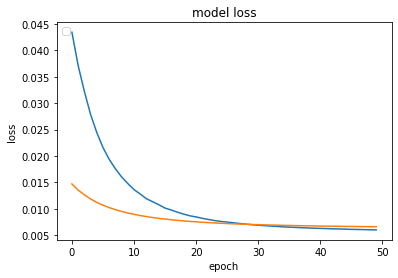

In [ ]:
def plot_hist(hist):
    # summarize history for loss
    fig, ax = plt.subplots()  # create figure & 1 axis

    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')

    plt.plot(hist.history['loss'])
    plt.plot(hist.history['val_loss'])

plot_hist(hist)

#**Recommendation **

In [ ]:
# Predict new Matrix Interactions, set score zero on visualized games
new_matrix = model.predict(X) * (X[0] == 0)

In [ ]:
# converting the reconstructed matrix back to a Pandas dataframe
new_users_items_matrix_df  = pd.DataFrame(new_matrix, 
                                          columns = users_items_matrix_df.columns, 
                                          index   = users_items_matrix_df.index)
new_users_items_matrix_df.head()

image_file_name,B0ioNSVJDk1_0,B0iqaKuArXw_0,dailyfashion_B00HA-_ivIr_0,dailyfashion_B00a282hKx8_0,dailyfashion_B00wb2ZBvUB_0,dailyfashion_B00wb2ZBvUB_3,dailyfashion_B00wb2ZBvUB_5,dailyfashion_B01-otLDKiv_0,dailyfashion_B0101f8JHsR_0,dailyfashion_B010Q7anbHP_2,dailyfashion_B010Q7anbHP_8,dailyfashion_B010kgrh_C6_0,dailyfashion_B015CRcDlaK_0,dailyfashion_B015h14F0NI_0,dailyfashion_B017Jh_l8an_0,dailyfashion_B017ZfLhI8m_0,dailyfashion_B017kaaAZCz_0,dailyfashion_B018H0zlPVR_0,dailyfashion_B018HYCFwlt_0,dailyfashion_B018wIdg6An_0,dailyfashion_B01_UF2HuIc_3,dailyfashion_B01_XowncoO_0,dailyfashion_B01_XowncoO_1,dailyfashion_B01_XowncoO_2,dailyfashion_B01_XowncoO_3,dailyfashion_B01mFFmlaXo_1,dailyfashion_B01mMPWgwtl_0,dailyfashion_B01mTUDFt3__0,dailyfashion_B01o8XYFg3R_1,dailyfashion_B01o8XYFg3R_3,dailyfashion_B01pRTWFxAK_0,dailyfashion_B01q8Jdl3Ni_2,dailyfashion_B01qqdMlRNh_1,dailyfashion_B01qqdMlRNh_2,dailyfashion_B01rAnmhZwG_0,dailyfashion_B01rIyUFl0Y_1,dailyfashion_B01rIyUFl0Y_3,dailyfashion_B01sMTglaVh_1,dailyfashion_B01sbSwFUwn_0,dailyfashion_B01sbSwFUwn_2,...,trend_B1HaP4WonKq_0,trend_B1JUu00B-TO_0,trend_B1PU5JqA_4W_0,trend_B1PU5gVHdtd_0,trend_B1PUZ8RDoRA_0,trend_B1PUhmYhLHb_0,trend_B1PUipwlhme_0,trend_B1PUnUsBrMx_0,trend_B1PUqcQhe0a_0,trend_B1PUqcuC5Qh_0,trend_B1PUyrEjFSI_2,trend_B1PUzkOg7RU_0,trend_B1Z-x6MpCVG_0,trend_B1Z5_KMJNnt_0,trend_B1Z5dUbHZrX_2,trend_B1Z5dUbHZrX_3,trend_B1Z5z7fl8o-_0,trend_B1Z5zdQB9lO_1,trend_B1Z6BiMFllI_0,trend_B1Z6ExoJa8E_2,trend_B1b_092BX5M_0,trend_B1c4X4CglKA_0,trend_B1cZ05FFhPI_1,trend_B1cZ1ZaF7Kn_3,trend_B1cZp2ohDJp_0,trend_B1cZyv3g3wK_4,trend_B1d6GsvjuLV_0,trend_B1eM2-gBwbc_0,trend_B1eQoFoAFyp_0,trend_B1eWZXVhnam_0,trend_B1eZ0NhHj94_0,trend_B1eZ3BjnEsW_1,trend_B1eZm6uHNiJ_0,trend_B1eZpfcBXFM_1,trend_B1eZq9igQNV_1,trend_B1eZtX0JATT_0,trend_B1eZw31oE0n_0,trend_B1eZx9kA5vU_0,trend_Bz34ivXFwFs_0,trend_BzwgaAvnYEf_0
user,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,-0.000957,0.138293,0.033496,-0.054053,-0.141661,-0.071323,0.023476,-0.021576,-0.030743,-0.048227,-0.092257,0.041470,-0.104825,-0.038746,0.078064,0.084407,-0.037197,-0.042488,0.025646,-0.008338,0.004840,0.019875,-0.046755,0.063113,0.013481,-0.016909,-0.116005,0.024135,-0.005542,-0.032670,-0.020614,-0.054088,-0.019864,0.007770,0.052224,-0.057173,0.107376,-0.008818,0.030829,0.011757,...,-0.034724,0.041838,0.107530,0.030071,0.008574,-0.052876,0.039722,0.065265,0.025294,0.000108,0.046794,-0.016234,0.090605,0.031018,-0.038639,0.022624,-0.028025,0.008420,0.033357,-0.000502,0.044402,0.045442,-0.064098,0.062033,0.008341,0.006317,0.013388,0.055280,0.044072,0.095703,0.001313,-0.051872,0.067763,0.013592,0.072359,0.063949,-0.066987,0.028020,0.027659,-0.008417
2,0.048770,0.021774,-0.000203,-0.071978,0.022497,0.123151,0.113759,-0.030516,0.001086,-0.011712,-0.042916,-0.093401,-0.088179,0.044959,0.002123,-0.066410,0.055790,-0.060772,0.012788,0.030639,0.035921,-0.009640,0.035658,0.101058,0.064613,0.014598,0.040471,-0.093034,0.004858,0.069696,0.019219,0.126703,-0.106909,-0.076118,-0.016735,0.034348,0.023481,0.010937,-0.024565,0.123430,...,-0.031633,0.051117,0.051959,-0.031513,-0.006477,0.031274,-0.003251,-0.052873,-0.092675,0.074605,-0.045260,-0.049892,-0.032877,0.022105,0.091187,0.033377,0.104120,0.041457,-0.139652,-0.006373,-0.038320,0.115546,0.005730,0.058450,-0.086011,-0.026988,0.076197,0.029051,0.042756,0.207711,0.021655,-0.113553,0.009183,0.044526,-0.077517,0.003767,-0.083473,-0.049303,0.088484,0.053504
3,-0.035186,-0.044997,-0.049150,0.001837,-0.047944,-0.000599,0.061034,0.006665,-0.008950,-0.031612,-0.061086,0.006089,0.070936,0.042345,0.029258,0.018562,0.034945,0.051373,-0.015893,-0.040577,-0.042565,0.019484,-0.033949,0.002799,0.029543,0.007115,0.065803,-0.008128,-0.032625,-0.017719,0.041371,0.018561,0.014743,-0.024939,0.003110,0.007039,-0.046281,-0.027050,0.039940,0.021015,...,-0.011944,0.054910,0.026679,-0.037998,-0.062044,0.023913,-0.012948,0.011132,0.014837,-0.005955,-0.024324,0.075201,0.033823,-0.010752,-0.00

In [ ]:
print(new_users_items_matrix_df.values.min(), new_users_items_matrix_df.values.max())

-0.8434577 0.8937546


In [ ]:
def recommender_for_user(user_id, interact_matrix, df_content, topn = 10):
    '''
    Recommender Games for UserWarning
    '''
    pred_scores = interact_matrix.loc[user_id].values

    df_scores   = pd.DataFrame({'image_file_name': list(users_items_matrix_df.columns), 
                               'score': pred_scores})

    df_rec      = df_scores.set_index('image_file_name')\
                    .join(df_content.set_index('image_file_name'))\
                    .sort_values('score', ascending=False)\
                    .head(topn)[['score', 'image_id']]
    
    return df_rec[df_rec.score > 0]

In [ ]:
new_users_items_matrix_df.index

Int64Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
             14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
             27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
             40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
             53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
             66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
             79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
             92,  93,  94,  95,  96,  97,  98,  99, 100],
           dtype='int64', name='user')

In [ ]:
# Recommended User Games
recommender_for_user(user_id         = 100, 
                     interact_matrix = new_users_items_matrix_df, 
                     df_content      = df)

,score,image_id
image_file_name,,
outfit_B05SGXODtoS_0,0.837976,8850
fashionstyle_B1O565aAs3a_3,0.730143,25281
stylish_B1czTFSAfGj_1,0.720933,35283
trend_B09Cn98JLPp_0,0.709939,15795
fashionweek_B02GMweA7og_0,0.704066,3372
styleblogger_B00m4ixAcf__0,0.668237,1309
streetfashion_B1O_OOfBhSP_0,0.658847,25513
dailylook_B1C_xFqFeNh_0,0.655429,34171
streettrend_Bz0YAsSJsUo_1,0.646247,1867
